In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
x=np.array([1,2,3,4,5,6]).reshape(-1,1)
y=np.array([35,40,50,60,65,70])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [2]:
print("Good Fit (Linear Regression)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2 Score:", r2_score(y_train, y_train_pred))

Good Fit (Linear Regression)
Train MSE: 1.875
Train R2 Score: 0.9657142857142857


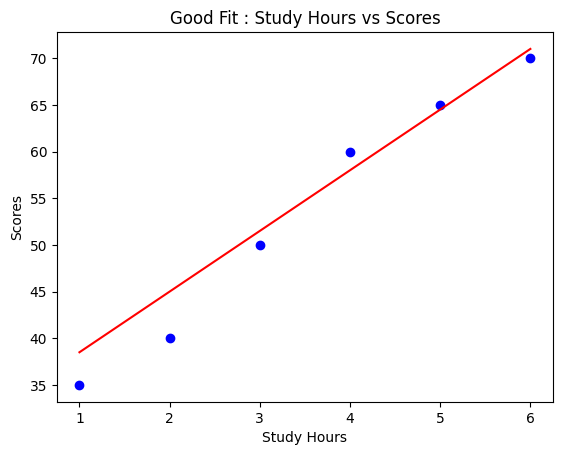

In [3]:
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red')
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Good Fit : Study Hours vs Scores")
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=5)
x_train_poly=poly_features.fit_transform(x_train)
x_test_poly=poly_features.transform(x_test)
overfit_model=LinearRegression()
overfit_model.fit(x_train_poly,y_train)
y_train_pred_poly=overfit_model.predict(x_train_poly)
y_test_pred_poly=overfit_model.predict(x_test_poly)
print("Overfit Model (Polynomial Regression)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_poly))
print("Train R2 Score:", r2_score(y_train, y_train_pred_poly))

Overfit Model (Polynomial Regression)
Train MSE: 8.096931440060883e-24
Train R2 Score: 1.0


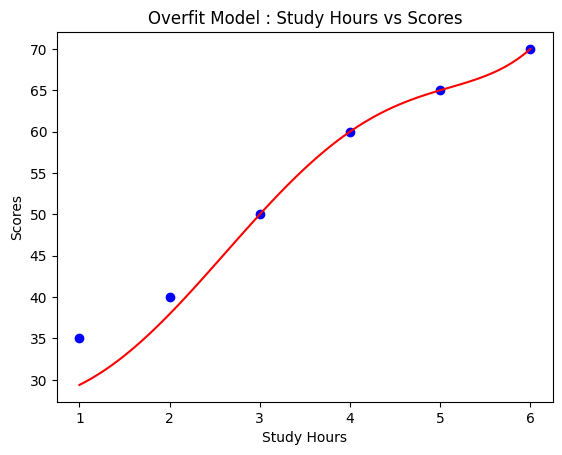

In [5]:
x_range=np.linspace(1,6,100).reshape(-1,1)
x_range_poly=poly_features.transform(x_range)
plt.scatter(x,y,color='blue')
plt.plot(x_range,overfit_model.predict(x_range_poly),color='red')
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Overfit Model : Study Hours vs Scores")
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=5)
x_poly=poly_features.fit_transform(x)
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(x_poly,y)
y_ridge_pred=ridge.predict(x_poly)
print("Regularized Model (Ridge Regression)")
print("MSE:", mean_squared_error(y, y_ridge_pred))
print("R2 Score:", r2_score(y, y_ridge_pred))


Regularized Model (Ridge Regression)
MSE: 0.2405805805562019
R2 Score: 0.9985320506949114


In [7]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_poly,y)
y_lasso_pred=lasso.predict(x_poly)
print("Regularized Model (Lasso Regression)")
print("MSE:", mean_squared_error(y, y_lasso_pred))
print("R2 Score:", r2_score(y, y_lasso_pred))

Regularized Model (Lasso Regression)
MSE: 0.7727384155729587
R2 Score: 0.9952849859388768


c:\Users\srira\OneDrive\Desktop\machine learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


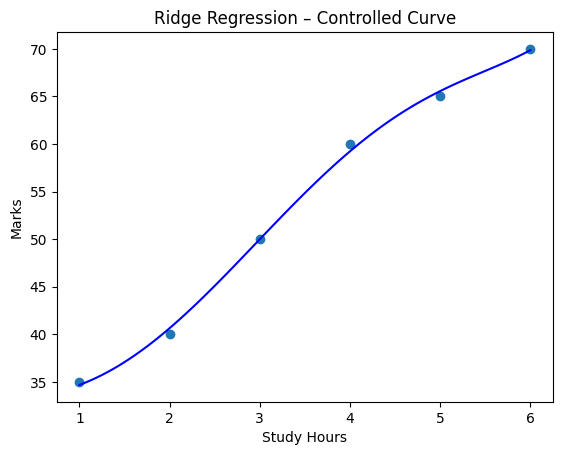

In [8]:
import matplotlib.pyplot as plt

X_grid = np.linspace(1, 6, 100).reshape(-1, 1)
X_grid_poly = poly_features.transform(X_grid)

plt.scatter(x, y)
plt.plot(X_grid, ridge.predict(X_grid_poly), color='blue')
plt.title("Ridge Regression – Controlled Curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()


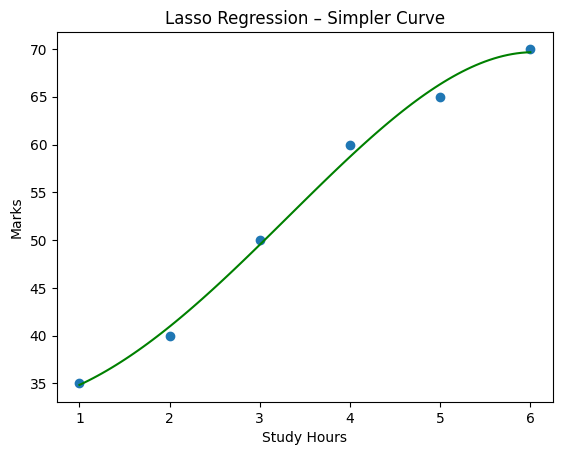

In [9]:
plt.scatter(x, y)
plt.plot(X_grid, lasso.predict(X_grid_poly), color='green')
plt.title("Lasso Regression – Simpler Curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()
